<a href="https://colab.research.google.com/github/Siddharth-Latthe-07/Innomatics/blob/main/Innomatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary Statistics:
             input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495


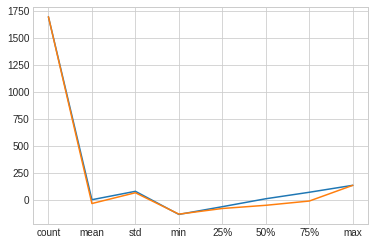

In [29]:
import pandas as pd   # imported the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/dataframe_.csv")

# Summary statistics of the input and output columns
print("Summary Statistics:")
print(df.describe())
plt.plot(df.describe())
plt.show()



Correlation between input and output:  0.5117757004836783


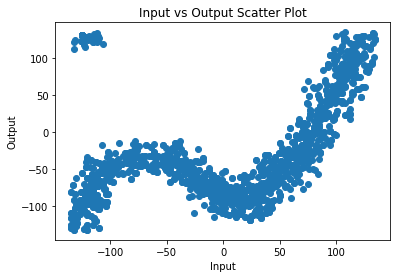

In [ ]:
# Correlation between the input and output columns
corr = df['input'].corr(df['output'])
print("\nCorrelation between input and output: ", corr)

# Plot the input and output columns
plt.scatter(df['input'], df['output'])
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Input vs Output Scatter Plot')
plt.show()



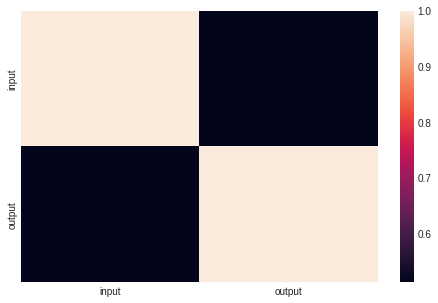

In [30]:
plt.style.use('seaborn-whitegrid')     # Plotted the Correlation graph between the features in the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr())
plt.show()

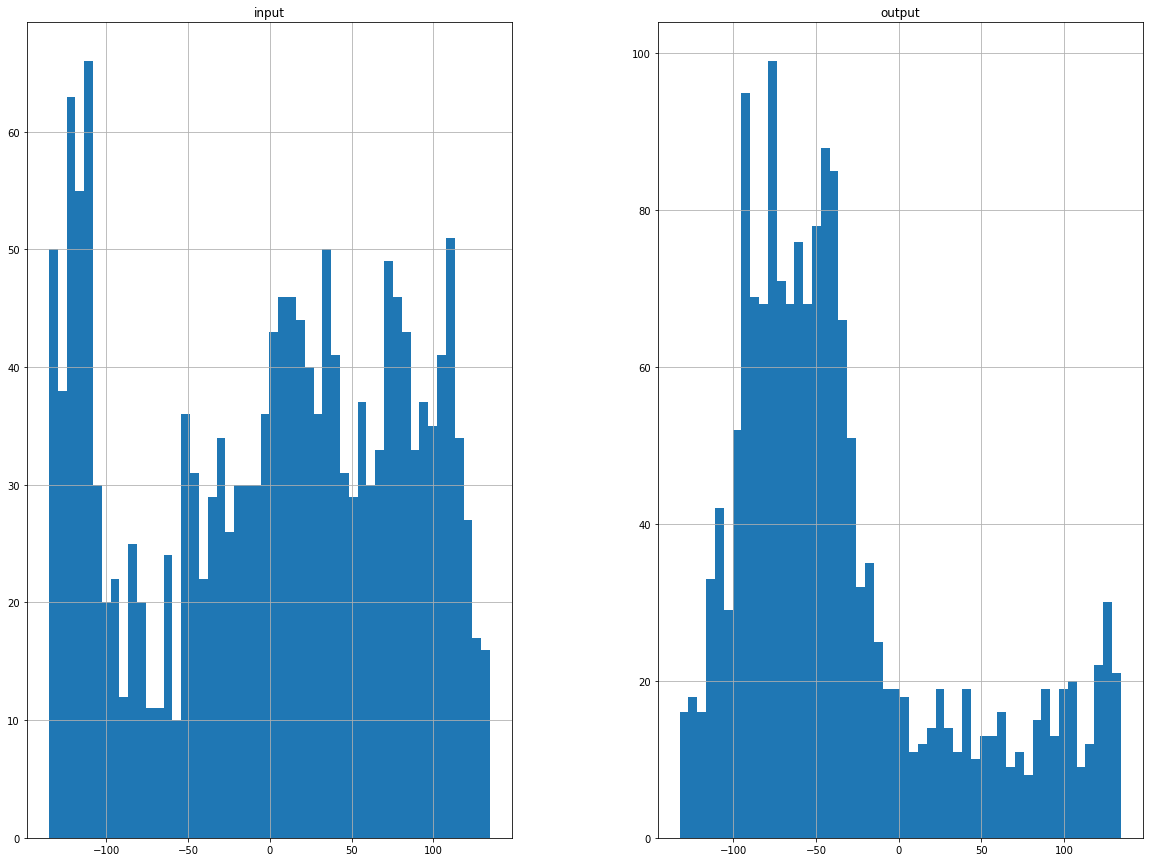

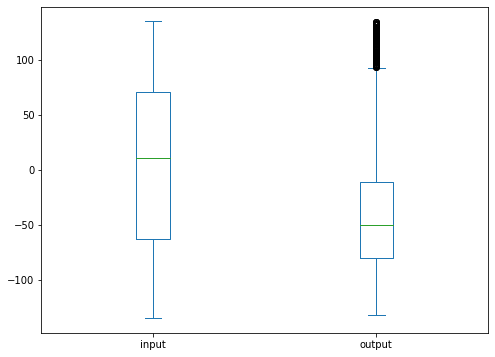

In [ ]:
# Histograms of the input and output columns
df.hist(bins=50, figsize=(20,15))
plt.show()

# Box plot of the input and output columns
df.plot(kind='box', figsize=(8, 6))
plt.show()



In [ ]:
if df.isnull().values.any():
    print("There are missing values in the data.")
    # Drop the rows that contain missing values
    df = df.dropna()

There are missing values in the data.


In [ ]:
# Remove outliers
mean = df['output'].mean()
std = df['output'].std()
data = df[(df['output'] > mean - 2*std) & (df['output'] < mean + 2*std)]

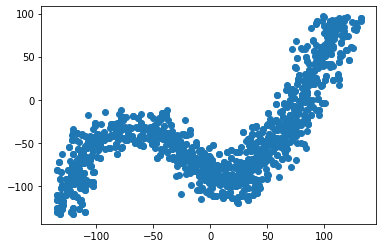

In [ ]:
plt.scatter(data['input'], data['output'])    # plotted the data after removal of outliers
plt.show()

Mean Squared Error: 1706.6740418278791
R2 Score: 0.3801781353317438


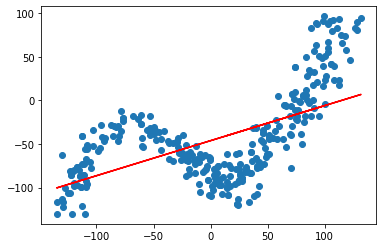

In [ ]:
# Split the data into training and test sets
X = data[['input']]
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the output on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot the predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()